In [2]:
from zipfile import ZipFile
from google.colab import drive
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from numpy import nan
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import isnan
import seaborn as sns




In [3]:
# Upload the zip file to Colab
from google.colab import files
uploaded = files.upload()

Saving individual+household+electric+power+consumption.zip to individual+household+electric+power+consumption.zip


In [4]:
# Extract the contents of the zip file
with ZipFile("individual+household+electric+power+consumption.zip", "r") as zip_ref:
    zip_ref.extractall()

In [5]:
# Check the contents of the extracted folder
extracted_files = zip_ref.namelist()
print("Extracted Files:", extracted_files)


Extracted Files: ['household_power_consumption.txt']


In [6]:
# Load the dataset
file_path = "household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';',
                 na_values = '?',dtype = float ,low_memory=False,infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

#Data Preprocessing

In [7]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [9]:
# Handle missing values
# Option 1: Interpolate missing values
df_interpolated = df.interpolate(method='linear')

In [10]:
df_interpolated.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
# Option 3: Forward-fill missing values
df_for_filled = df.ffill()

In [12]:
df_for_filled.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [13]:
df = df.ffill()

In [14]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [27]:
# Option 2: Fill missing values with mean
df_mean = df.fillna(df.mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [17]:
# Print the first few rows of the preprocessed DataFrame
print("Sample of Interpolated Data:\n", df_interpolated.head())
print("Sample of Mean-Filled Data:\n", df_filled_mean.head())
print("Sample of Forward-Filled Data:\n", df_for_filled.head())

Sample of Interpolated Data:
                      Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   

In [18]:
print (df.info())
print (df.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None
(2075259, 7)


Resampling is a method of changing the time period of time series observations such that it can be summarised or aggregated. The frequency can either be increased by upsampling or reduced by downsampling.

the data was taking at minute interval, it will then be aggregated into daily input through downsampling

In [19]:
#downsampling from minute to daily sampling
#daily resampling
daily_df = df.resample('D').sum()
print(daily_df.shape)
daily_df.head()


(1442, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


downsampling with df_mean

In [28]:
#downsampling from minute to daily sampling
#daily resampling
df_mean = df.resample('D').sum()
print(df_mean.shape)
df_mean.head()


(1442, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


# Data visualization  

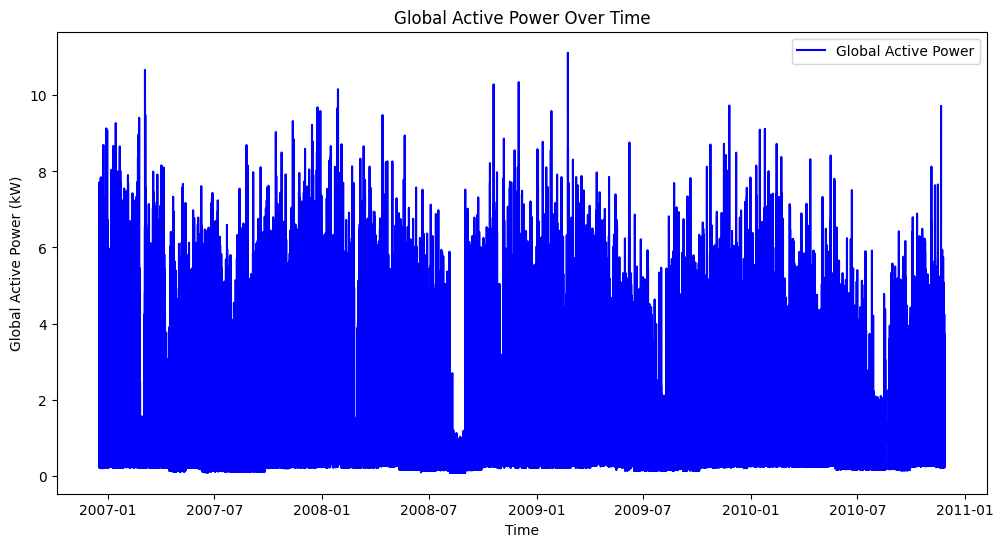

In [20]:
# Visualize time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power', color='blue')
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

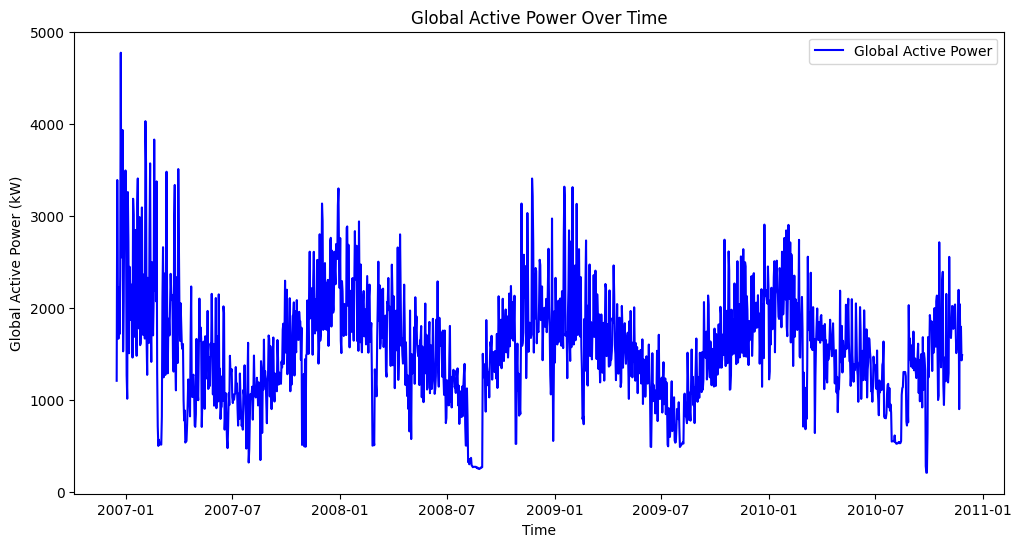

In [21]:
# Visualize time series data
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['Global_active_power'], label='Global Active Power', color='blue')
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

the above visualizations, the first graph shows messy visuals and did not clearly show trends and patttern compare the the daily_df, therefore, we shall focus on the daily_df for the rest of the task

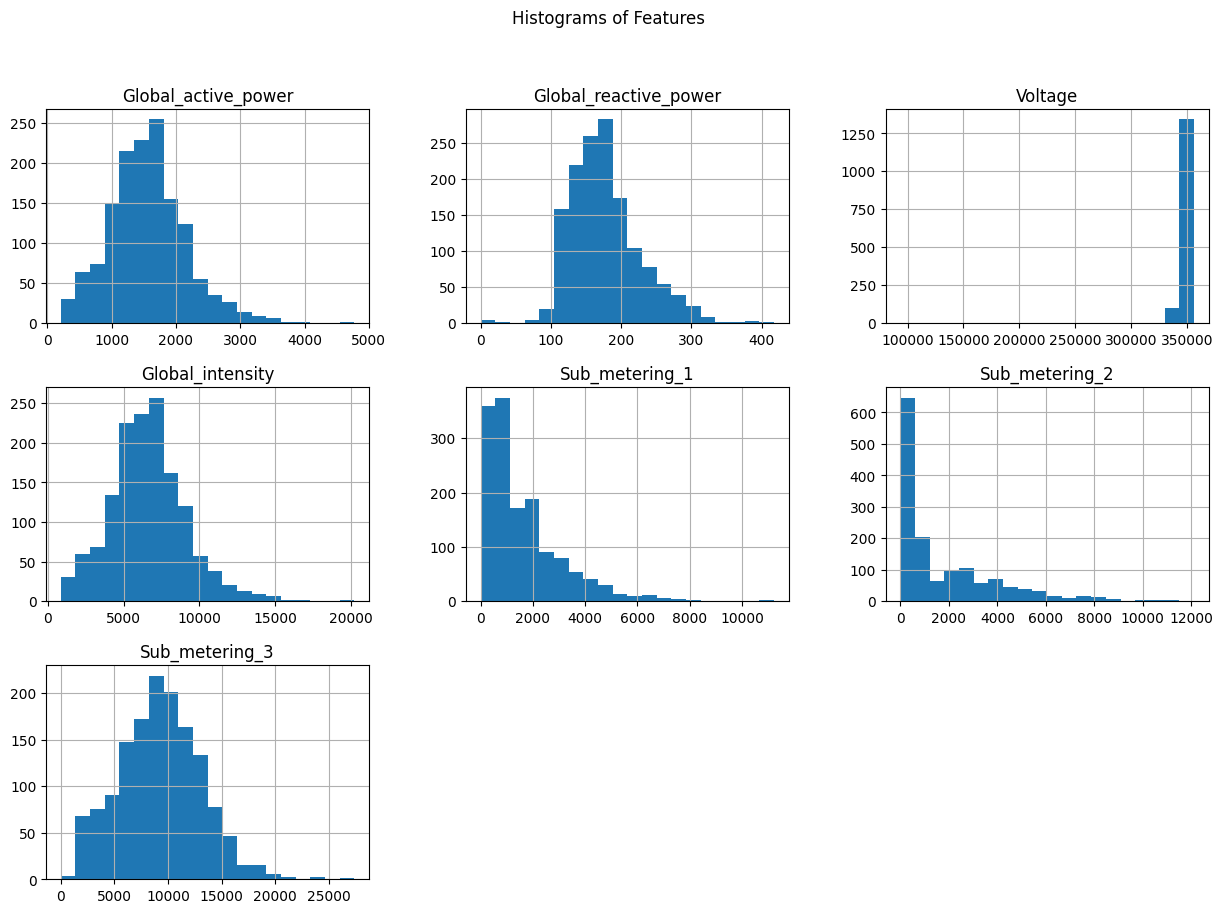

In [22]:
# Check the distribution of each feature
daily_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

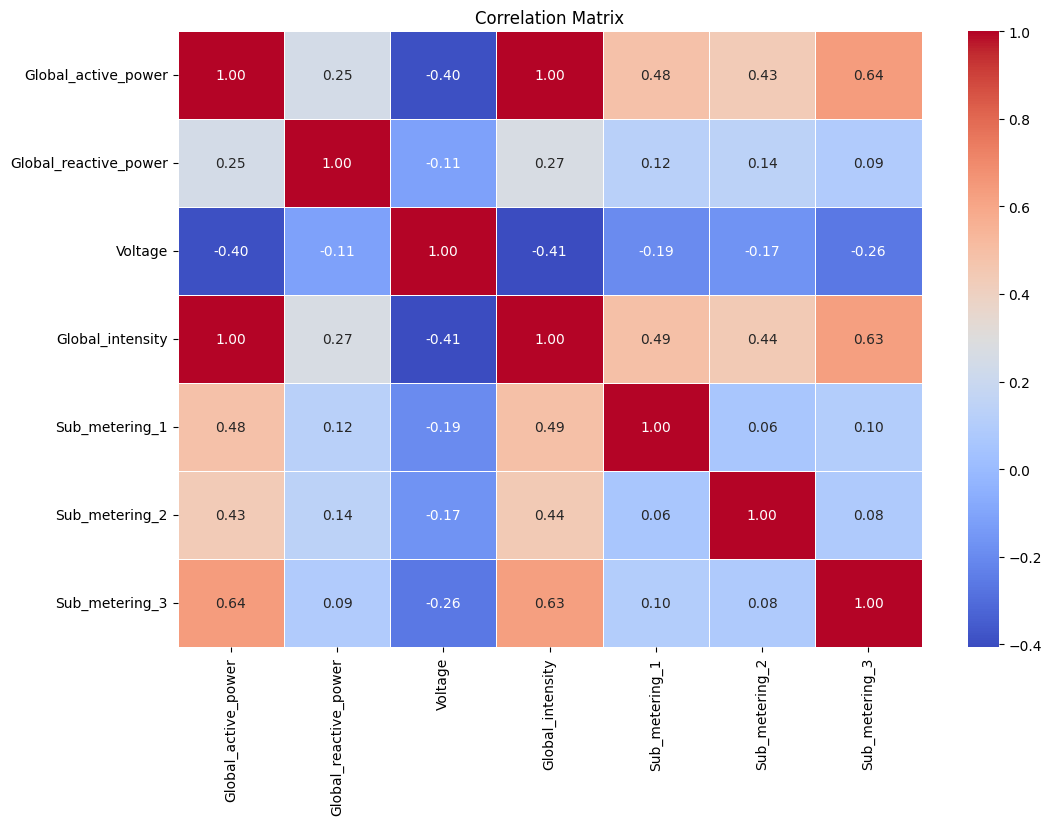

In [23]:
# Explore correlations between different features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Test for stationarity
Augmented Dickey Fuller test will be performed on the various sample sizes to check for the stationarity of the series. The ADF test generates a tuple made of six parameters, the ADF-test statistics, P-value, number of lags used, number of observation used, critical values at 1%, 5%, 10% and the maximized information criterion.

we would be looking at the first five values using the P-value to determine if the series is stationary, wher P-value< 0.05.

In [24]:
# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity
from statsmodels.tsa.stattools import adfuller

#since we have several samples of time series lets define a function that could check for
#stationarity and output the various columns that are stationary in the series.

def adf_test(d_set):
    dftest = adfuller(d_set, autolag='AIC')
    adf = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','# Lags','# Observations'])

    for key, value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")

#this function takes a time series datframe and checks the columns that are stationary.
def get_stationarity(data):
    for i in data.columns:
        print("Column: ",i)
        print('--------------------------------------')
        adf_test(data[i])

In [25]:
get_stationarity(daily_df) #calling the function to test for stationarity

Column:  Global_active_power
--------------------------------------
Test Statistic            -3.760052
p-value                    0.003344
# Lags                    22.000000
# Observations          1419.000000
Critical Value (1%)       -3.434967
Critical Value (5%)       -2.863579
Critical Value (10%)      -2.567856
dtype: float64

Series is Stationary
Column:  Global_reactive_power
--------------------------------------
Test Statistic            -4.225308
p-value                    0.000597
# Lags                    22.000000
# Observations          1419.000000
Critical Value (1%)       -3.434967
Critical Value (5%)       -2.863579
Critical Value (10%)      -2.567856
dtype: float64

Series is Stationary
Column:  Voltage
--------------------------------------
Test Statistic            -2.906903
p-value                    0.044551
# Lags                    23.000000
# Observations          1418.000000
Critical Value (1%)       -3.434970
Critical Value (5%)       -2.863580
Critical Val

In [26]:
#lets calculate moving average and rolling standard deviation for annual window i.e 365 days since we are taking daily observation
rolling_mean = daily_df.rolling(window = 365).mean()
rolling_std = daily_df.rolling(window = 365).std()

In [29]:
#df_filled_mean

#lets calculate moving average and rolling standard deviation for annual window i.e 365 days since we are taking daily observation
rolling_mean_2 = df_mean.rolling(window = 365).mean()
rolling_std_2 = df_mean.rolling(window = 365).std()

<Figure size 1500x800 with 0 Axes>

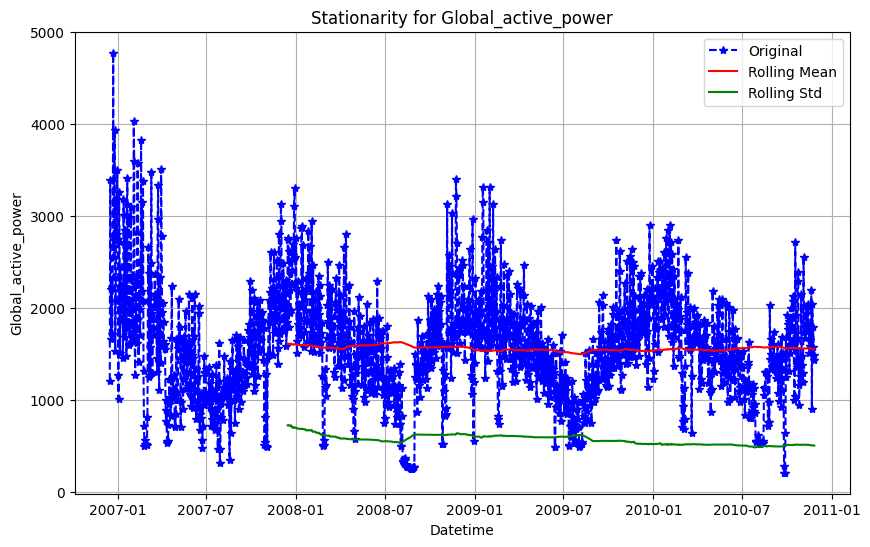

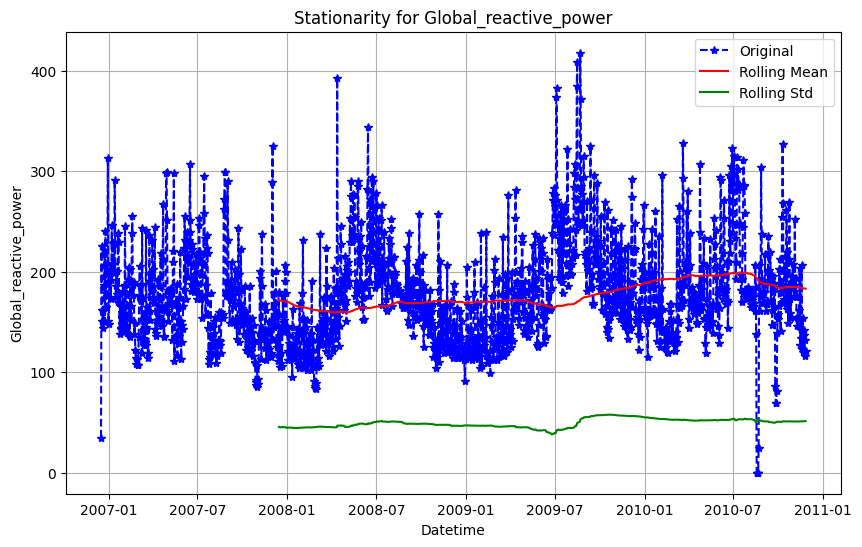

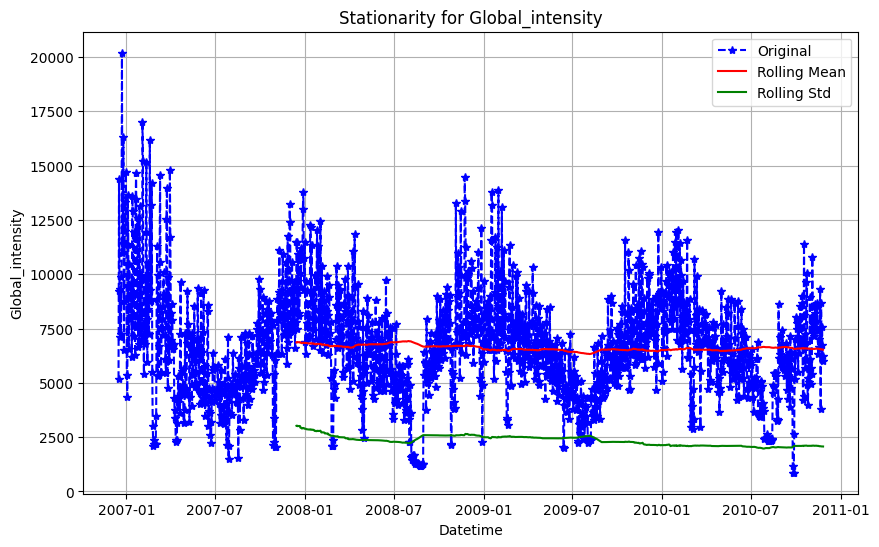

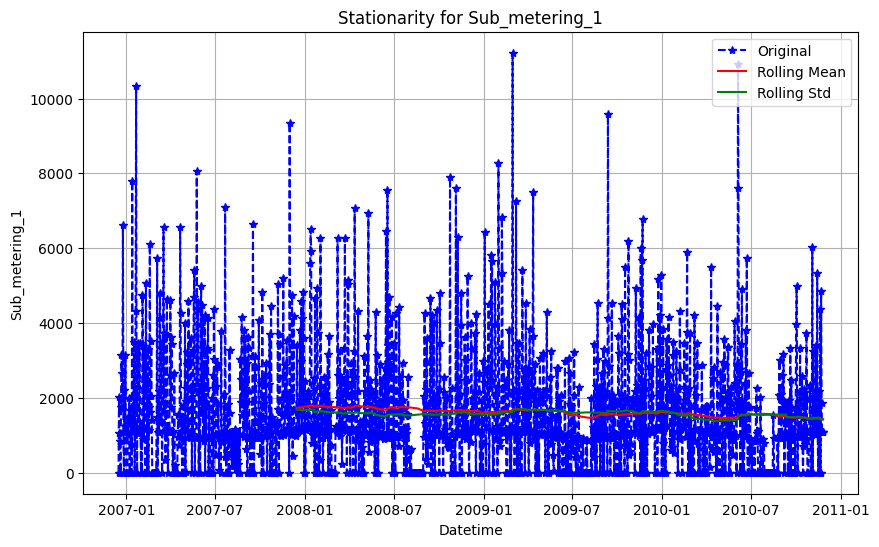

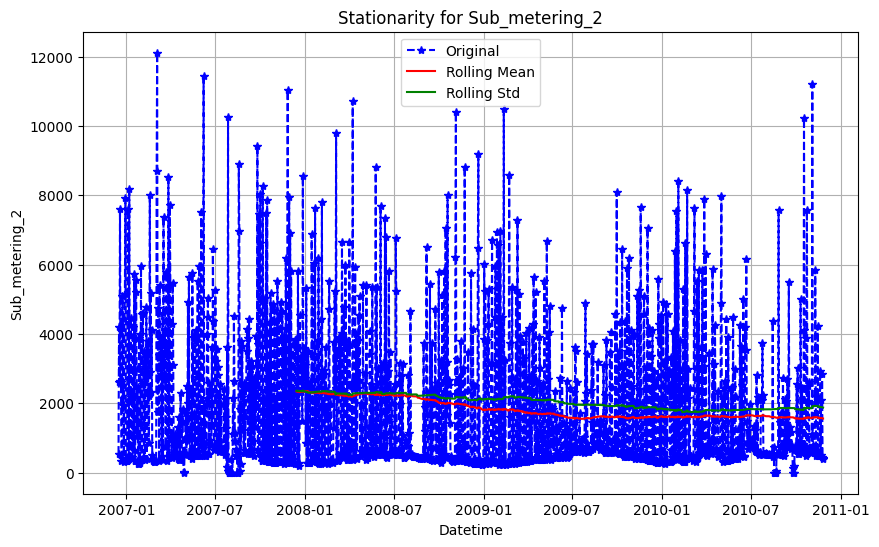

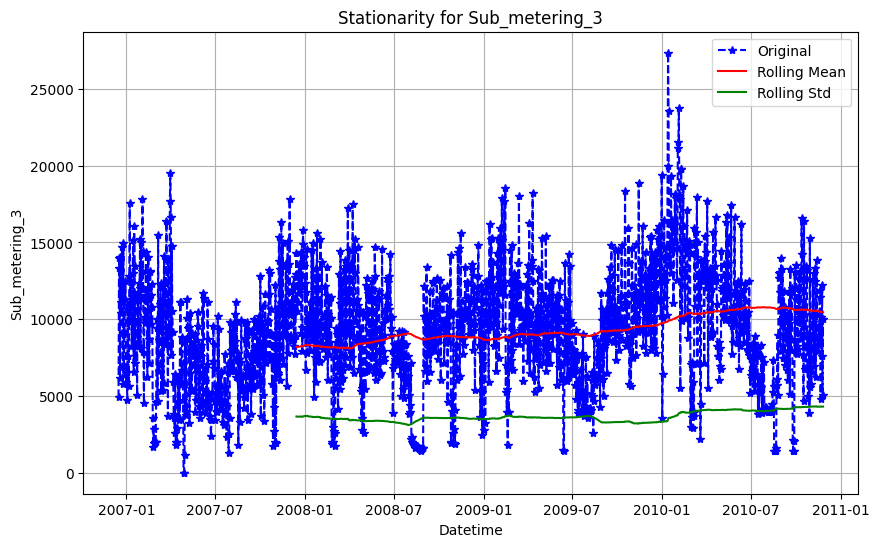

In [31]:
import matplotlib.pyplot as plt

window_size = 365
rolling_mean_df = daily_df.rolling(window=window_size).mean()
rolling_std_df = daily_df.rolling(window=window_size).std()

plt.figure(figsize=(15, 8))

# Iterate through each column in the DataFrame
for column in daily_df.drop('Voltage', axis=1).columns:
    plt.figure(figsize=(10, 6))

    # Plot original data
    original = plt.plot(daily_df.index, daily_df[column], '--', marker='*', label='Original', color='blue')

    # Plot rolling mean
    plt.plot(rolling_mean_df.index, rolling_mean_df[column], color='red', label='Rolling Mean')

    # Plot rolling standard deviation
    plt.plot(rolling_std_df.index, rolling_std_df[column], color='green', label='Rolling Std')

    plt.grid()
    plt.title(f'Stationarity for {column}')
    plt.legend(loc='best')
    plt.xlabel('Datetime')
    plt.ylabel(column)

plt.show()


# Question 11

Text(0, 0.5, 'global active power')

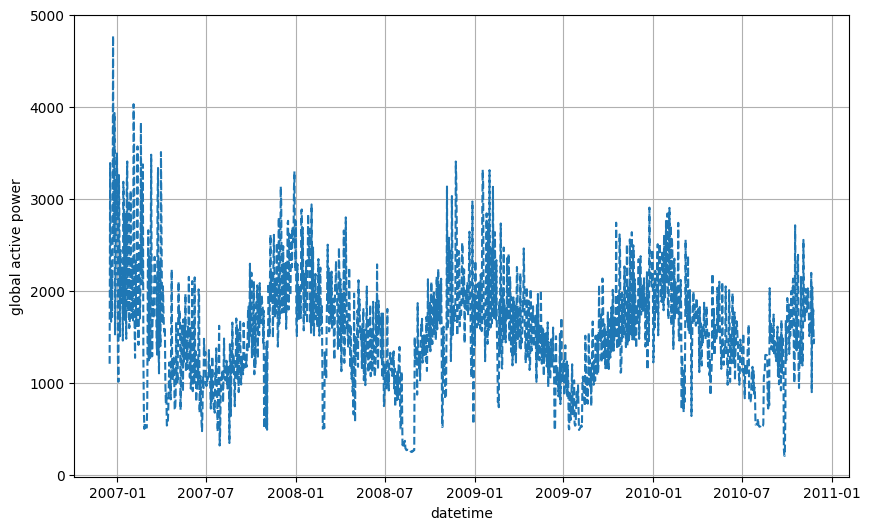

In [32]:
#plot of global active power on th daily time frame
plt.figure(figsize=(10,6))
plt.plot(daily_df.index, daily_df.Global_active_power,'--')
plt.grid()
plt.xlabel('datetime')
plt.ylabel('global active power')

In [33]:
from scipy.stats import pearsonr
corr, _ = pearsonr(daily_df.Global_active_power, daily_df.Global_reactive_power)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.047


In [34]:
corr, _ = pearsonr(df_mean.Global_active_power, df_mean.Global_reactive_power)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.047


In [35]:
from scipy.stats import pearsonr
corr, _ = pearsonr(daily_df.Voltage , daily_df.Global_intensity)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.054


In [ ]:
from scipy.stats import pearsonr
pearsonr(df['Voltage'],df['Global_intensity'])


PearsonRResult(statistic=-0.4074536992188588, pvalue=0.0)

Building the Models (univariate model will be built with facebook prophet, the model can only work on univariate model,

creating a facebook prophet model to forecast the global active power a vs the target univariate data.

#FB prophet Model

# Univariate Model

In [ ]:
from prophet import Prophet

In [ ]:
#we have to reset the datetime index and assign it as a column in the new dataframe
daily_df.reset_index(inplace=True)
#next we take a slice of the Dataframe columns that would be used to build the prophet model and assign it to a variable
prophet_daily = daily_df[['datetime','Global_active_power']]


In [ ]:
#renaming the columns to what prophet understands i.e ds and y
prophet_daily = prophet_daily.rename(columns = {'datetime': 'ds','Global_active_power': 'y'})
print(prophet_daily.shape)
prophet_daily.head()


(1442, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [ ]:
# splitting into train and test sets

train_set = prophet_daily.iloc[:1077,:]
test_set = prophet_daily.iloc[1077:,:]
print(train_set.shape)
print(test_set.shape)

(1077, 2)
(365, 2)


In [ ]:
#fitting the model to the dataset
p_model = Prophet()
p_model.fit(train_set)
pred = p_model.predict(test_set)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8so1mt9y/gr6g0t93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8so1mt9y/_8gkzvxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2951', 'data', 'file=/tmp/tmp8so1mt9y/gr6g0t93.json', 'init=/tmp/tmp8so1mt9y/_8gkzvxw.json', 'output', 'file=/tmp/tmp8so1mt9y/prophet_model9ugb8ee6/prophet_model-20231130144535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Define a model for the calculation of MAPE
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [ ]:
mape = Metric(test_set['y'],pred['yhat'])
print(f'the Mean Average Percentage Error ( MAPE) is:{round(mape,1)}')

the Mean Average Percentage Error ( MAPE) is:26.2


Question 15

RMSE

In [ ]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set['y']),np.array(pred['yhat'])))
print('The Root Mean Square Error(rmse) value is : %s' %(round(rmse,1)))

The Root Mean Square Error(rmse) value is : 401.9


Figure(900x900)


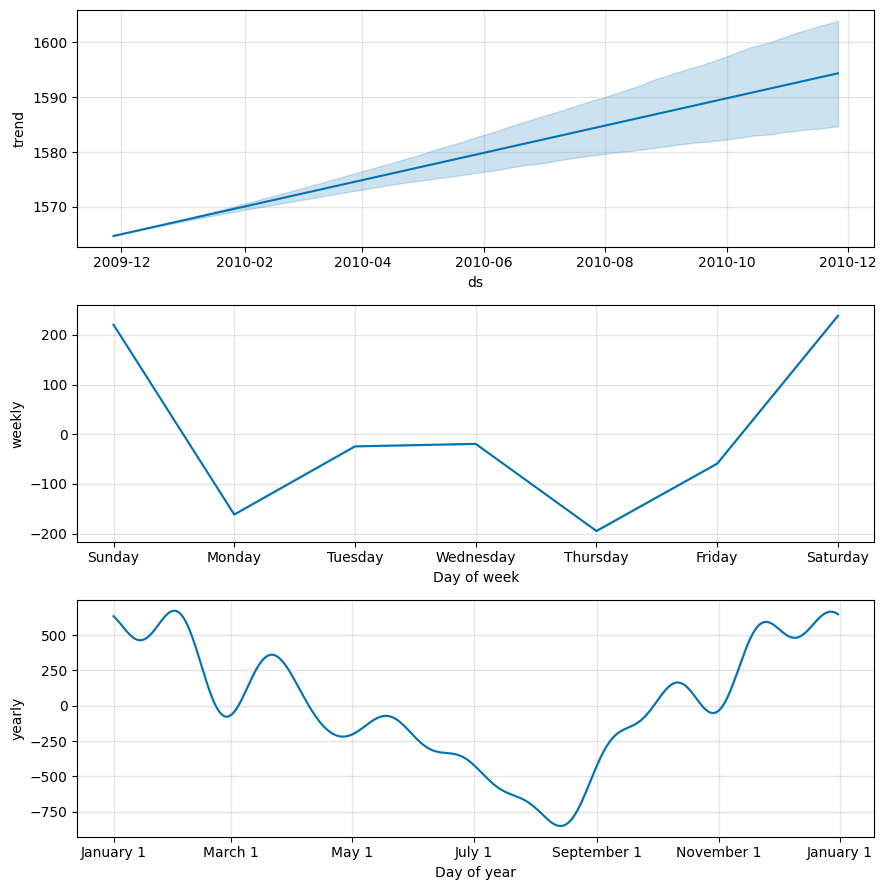

In [ ]:
print(p_model.plot_components(pred))
# from the plot of yearly seasonality AUGUST has the lowest value.

Multivariate Model

Question. 17

( MAPE)



In [ ]:
# reseting the index column of the daily_df

multi_prophet = daily_df
print(multi_prophet.shape)
multi_prophet.head()


(1442, 8)


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [ ]:
# Renaming the columns to prophet name format
multi_prophet = multi_prophet.rename(columns = {'datetime':'ds','Global_active_power':'y','Global_reactive_power':'add1',
                                                'Voltage':'add2','Global_intensity':'add3','Sub_metering_1':'add4',
                                                'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [ ]:
#checking the renamed dataframe
multi_prophet.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [ ]:
train_set_multi = multi_prophet.iloc[:1077,:]
test_set_multi = multi_prophet.iloc[1077:,:]
print(train_set_multi.shape)
print(test_set_multi.shape)

(1077, 8)
(365, 8)


In [ ]:
# Creating the prophet multivariate model
m_model = Prophet()
m_model.add_regressor('add1')
m_model.add_regressor('add2')
m_model.add_regressor('add3')
m_model.add_regressor('add4')
m_model.add_regressor('add5')
m_model.add_regressor('add6')

In [ ]:
# Fitting the model to train set
m_model.fit(train_set_multi)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8so1mt9y/uddgjl0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8so1mt9y/tbw7zfhu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62243', 'data', 'file=/tmp/tmp8so1mt9y/uddgjl0i.json', 'init=/tmp/tmp8so1mt9y/tbw7zfhu.json', 'output', 'file=/tmp/tmp8so1mt9y/prophet_modeln5wfgm0j/prophet_model-20231130144615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Making prediction with test_set
m_pred = m_model.predict(test_set_multi)
#m_pred

In [ ]:
# calculating the MAPE using the previously defined function
mape = Metric(test_set_multi['y'],m_pred['yhat'])
print('The Mean Average Percentage Error ( MAPE) Is:%s' %round(mape,2))

The Mean Average Percentage Error ( MAPE) Is:2.77


Question. 18

( RMSE)




In [ ]:
#calculate rmse
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = train_set_multi
predicted = forecast['yhat'][:365]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

NameError: ignored

Question. 19

Figure(900x1200)


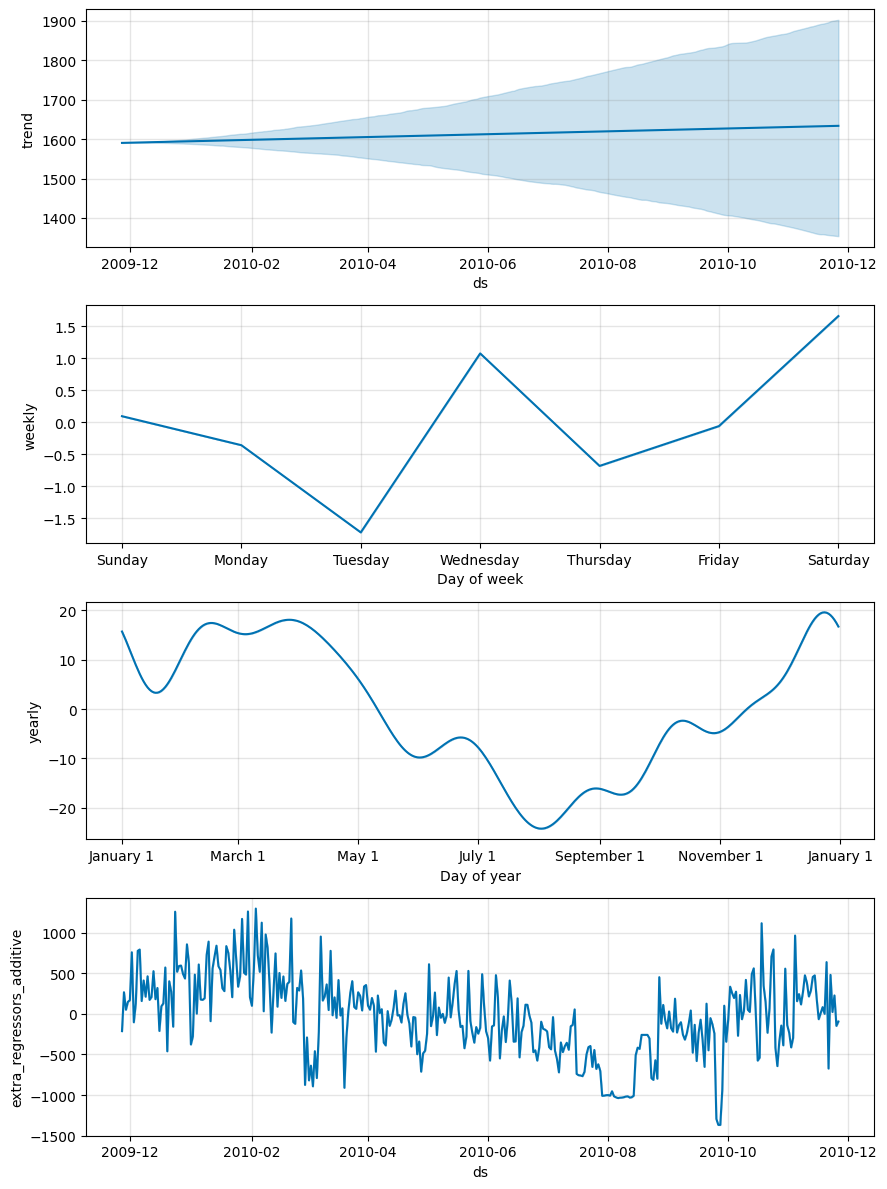

In [ ]:
print(m_model.plot_components(m_pred))
#from the plot of the weekly multivariate forecasted model , TUESDAY has the lowest value

# Time Series Specific Exploratory Methods